 <center style='font-size:30px'><b> Abstract</b></center>

Feature Selection is one of the first and the most important steps while performing any machine learning task. It is the process of selecting the most useful features in the dataset. In this project I have applied Genetic Algorithms to select the best set of features in an Online Shoppers Intention's Dataset using an evolutionary computation framework, DEAP, Distributed Evolutionary Algorithms in Python.

### Genetic Algorithm implementation in python using deap

### DEAP : Distributed Evolutionary Algorithms in Python

DEAP:
   * evolutionary computation framework,
   * for rapid prototyping and testing of ideas.
  


1) <font size="3"><b>Toolbox</b></font>

   * class deap.base.Toolbox
   * A toolbox for evolution that contains the evolutionary operators.
       * `clone()` :-> copy.deepcopy
       * `map()` :-> the default map function
   * register(): Use the register function to populate the toolbox with other function
       * register(alias, method[, argument[, ...]])
          * Parameters:
              * `alias` – The name the operator will take in the toolbox. If the alias already exist it will overwrite the the operator already present.
              * `function` – The function to which refer the alias.
              * `argument` – One or more argument (and keyword argument) to pass automatically to the registered function when called, optional.  
   * unregister(alias): unregister alias from toolbox
   

2) <font size="3"><b>Fitness</b></font>
* class deap.base.Fitness([values])
    * The fitness is a measure of quality of a solution.
    * values – The initial values of the fitness as a tuple, optional(if empty, then invalid) .
    * valid – Assess if a fitness is valid or not.
    * values – Fitness values.
        * Use directly individual.fitness.values = values in order to set the fitness
        * del individual.fitness.values in order to clear (invalidate) the fitness.
    * The provided Fitness class is an abstract class that needs a weights attribute in order to be functional. 
        * A minimizing fitness is built using negatives weights
        * A maximizing fitness has positive weights.
            * creator.create("FitnessMin", base.Fitness, weights=(-1.0,)) (minimize)
         
* create():
    * The create() function takes at least two arguments
        * a name for the newly created class.
        * a base class.
        * subsequent argument becomes an attribute of the class.
* Individual
        
        
        
3) <font size="3"><b>Initialization</b></font>

<u>initRepeat</u>
* deap.tools.initRepeat(container, func, n)
* Call the function container with a generator function corresponding to the calling n times the function func.
    * Parameters:
        * container – The type to put in the data from func.
        * func – The function that will be called n times to fill the container.
        * n – The number of times to repeat func.
  
4) <font size="3"><b>Selection</b></font>

<u>selRoulette</u>
* deap.tools.selRoulette(individuals, k, fit_attr='fitness')
* Select k individuals from the input individuals using k spins of a roulette.
* The selection is made by looking only at the first objective of each individual. The list returned contains references to the input individuals.
    * Parameters:
        * individuals – A list of individuals to select from.
        * k – The number of individuals to select.
        * fit_attr – The attribute of individuals to use as selection criterion
    * Returns:	
        * A list of selected individuals. 
 


5) <font size="3"><b>Crossover</b></font>

<u>cxOnePoint</u>
* deap.tools.cxOnePoint(ind1, ind2)
* Executes a one point crossover on the input sequence individuals. The two individuals are modified in place. The resulting individuals will respectively have the length of the other.
    * Parameters:
        * ind1 – The first individual participating in the crossover.
        * ind2 – The second individual participating in the crossover.

    * Returns:	
        * A tuple of tow individuals



6) <font size="3"><b>Mutation</b></font>

<u>mutShuffleIndexes</u>
* deap.tools.mutShuffleIndexes(individual, indpb)
* Shuffle the attributes of the input individual and return the mutant. The individual is expected to be a sequence. The indpb argument is the probability of each attribute to be moved. Usually this mutation is applied on vector of indices.

    * Parameters:
        * individual – Individual to be mutated.
        * indpb – Independent probability for each attribute to be exchanged to another position.
    * Returns:	
        * A tuple of one individual


7) <font size="3"><b>HallOfFame</b></font>

* class deap.tools.HallOfFame(maxsize, similar=<built-in function eq>)
* The hall of fame contains the best individual that ever lived in the population during the evolution. It is lexicographically sorted at all time so that the first element of the hall of fame is the individual that has the best first fitness value ever seen.
* The insertion is made so that old individuals have priority on new individuals. A single copy of each individual is kept at all time, the equivalence between two individuals is made by the operator passed to the similar argument.

    * Parameters:
        * maxsize – The maximum number of individual to keep in the hall of fame.
        * similar – An equivalence operator between two individuals, optional. It defaults to operator operator.eq().
    


* It's interface is very similar to a list,we can retrieve its length, iterate on it forward and backward, and get an item or a slice from it.


7) <font size="3"><b>Statistics</b></font>

* class deap.tools.Statistics([key])
* The statistics object receives a key argument that is used to get the values on which the function will be computed. If not provided the key argument defaults to the identity function.
* The value returned by the key may be a multi-dimensional object, i.e.: a tuple or a list, 
    * Parameters:
        * key – A function to access the values on which to compute the statistics, optional.
        
7) <font size="3"><b>Algorithms</b></font>

* The algorithms module is intended to contain some specific algorithms in order to execute very common evolutionary algorithms.
* Most of the algorithms in this module use operators registered in the toolbox.
* Generally, the keyword used are:
    * Keywords:
        * mate() for crossover
        * mutate() for mutation
        * select() for selection
        * evaluate() for evaluation
        
* <font size = '3'><b>eaSimple</b></font>
     * deap.algorithms.eaSimple(population, toolbox, cxpb, mutpb, ngen,[,stats, halloffame, verbose])
     * The algorithm takes in a population and evolves it in place using the varAnd() method. It returns the optimized population and a Logbook with the statistics of the evolution. The logbook will contain the generation number, the number of evaluations for each generation and the statistics if a Statistics is given as argument. The cxpb and mutpb arguments are passed to the varAnd() function
         * Parameters:	
            * population – A list of individuals.
            * toolbox – A Toolbox that contains the evolution operators.
            * cxpb – The probability of mating two individuals.
            * mutpb – The probability of mutating an individual.
            * ngen – The number of generation.
            * stats – A Statistics object that is updated inplace, optional.
            * halloffame – A HallOfFame object that will contain the best individuals, optional.
            * verbose – Whether or not to log the statistics.
         * Returns:	
            * The final population
            * A class:~deap.tools.Logbook with the statistics of the evolution

In [1]:
#Import all the necessary libraries

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from deap import creator, base, tools, algorithms
from scoop import futures
import random
import numpy
from scipy import interpolate
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

/home/nimisha/.local/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Read the data
dfData = pd.read_csv('online_shoppers_intention.csv')


# Encode the classification labels to numbers
# Get classes and one hot encoded feature vectors
le = LabelEncoder()
le.fit(dfData['Revenue'])
allClasses = le.transform(dfData['Revenue'])
allFeatures = dfData.drop(['Revenue'], axis=1)

# Divide the data into train, test, and validation sets
X_trainAndTest, X_validation, y_trainAndTest, y_validation = train_test_split(allFeatures,
                                                                              allClasses,
                                                                              test_size=0.20,
                                                                              random_state=42
                                                                             )
X_train, X_test, y_train, y_test = train_test_split(X_trainAndTest, y_trainAndTest,
                                                    test_size=0.20, random_state=42)

In [3]:
# Feature subset fitness function
# Here we evaluate the fitness based on classification accuracy

def getFitness(individual, X_train, X_test, y_train, y_test):

    # Parse our feature columns that we don't use
    # Apply one hot encoding to the features
    # 1: We are using this Feature
    # 0: We are not using this Feature
    cols = [index for index in range(len(individual)) if individual[index] == 0]
    X_trainParsed = X_train.drop(X_train.columns[cols], axis=1)
    X_trainOhFeatures = pd.get_dummies(X_trainParsed)
    X_testParsed = X_test.drop(X_test.columns[cols], axis=1)
    X_testOhFeatures = pd.get_dummies(X_testParsed)

    
    clf = RandomForestClassifier(n_estimators=100, max_depth=2,
                             random_state=0)
    clf.fit(X_trainOhFeatures, y_train)
    predictions = clf.predict(X_testOhFeatures)
    accuracy = accuracy_score(y_test,predictions)


    # Return calculated accuracy as fitness
    return (accuracy,)

In [4]:
# Create Individual
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Create Toolbox
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool,
                 len(dfData.columns) - 1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Continue filling toolbox...
toolbox.register("evaluate", getFitness, X_train=X_train, X_test=X_test, y_train=y_train,
                 y_test=y_test)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selRoulette)

#========

In [5]:
def getHof():

    # Initialize variables to use eaSimple
    numPop = 100
    numGen = 5
    pop = toolbox.population(n=numPop)
    hof = tools.HallOfFame(numPop * numGen)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("std", numpy.std)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)

    # Launch genetic algorithm
    pop, log = algorithms.eaSimple(pop, toolbox, cxpb=0.5, mutpb=0.2, ngen=numGen,
                                   stats=stats, halloffame=hof, verbose=True)

    # Return the hall of fame
    return hof

In [6]:
def getMetrics(hof):

    # Get list of percentiles in the hall of fame
    percentileList = [i / (len(hof) - 1) for i in range(len(hof))]

    # Gather fitness data from each percentile
    testAccuracyList = []
    validationAccuracyList = []
    individualList = []
    for individual in hof:
        testAccuracy = individual.fitness.values
        validationAccuracy = getFitness(individual, X_trainAndTest, X_validation,
                                        y_trainAndTest, y_validation)
        testAccuracyList.append(testAccuracy[0])
        validationAccuracyList.append(validationAccuracy[0])
        individualList.append(individual)
    testAccuracyList.reverse()
    validationAccuracyList.reverse()
    return testAccuracyList, validationAccuracyList, individualList, percentileList


Test accuracy with all features: 	0.8459199189052204
Validation accuracy with all features: 	0.8333333333333334

gen	nevals	avg     	std       	min    	max     
0  	100   	0.847035	0.00397863	0.84592	0.866194
1  	73    	0.846219	0.00208249	0.84592	0.865687
2  	55    	0.846163	0.00194125	0.84592	0.864673
3  	65    	0.84669 	0.0035439 	0.84592	0.868221
4  	69    	0.846817	0.00439105	0.84592	0.874303
5  	65    	0.847228	0.00569208	0.84592	0.884947

---Optimal Feature Subset(s)---

Percentile: 			1.0
Validation Accuracy: 		0.8742903487429035
Individual: 	[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1]
Number Features In Subset: 	10
Feature Subset: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'Month', 'OperatingSystems', 'Browser', 'VisitorType', 'Weekend']


/home/nimisha/.local/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


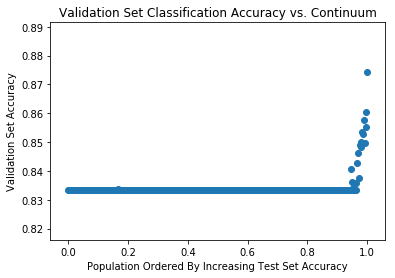

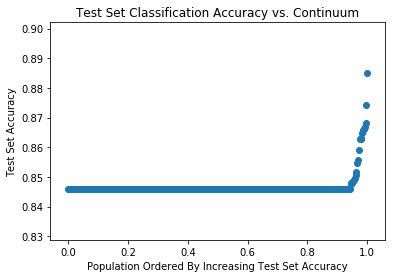

In [8]:
if __name__ == '__main__':

    '''
    First, we will apply logistic regression using all the features to 
    acquire a baseline accuracy.
    '''
    individual = [1 for i in range(len(allFeatures.columns))]
    testAccuracy = getFitness(individual, X_train, X_test, y_train, y_test)
    validationAccuracy = getFitness(individual, X_trainAndTest, X_validation,
                                    y_trainAndTest, y_validation)
    print('\nTest accuracy with all features: \t' + str(testAccuracy[0]))
    print('Validation accuracy with all features: \t' + str(validationAccuracy[0]) + '\n')

    '''
    Now, we will apply a genetic algorithm to choose a subset of features
    that gives a better accuracy than the baseline.
    '''
    hof = getHof()
    testAccuracyList,validationAccuracyList,individualList,percentileList = getMetrics(hof)

    # Get a list of subsets that performed best on validation data
    maxValAccSubsetIndicies = [index for index in range(len(validationAccuracyList))
                               if validationAccuracyList[index] == max(validationAccuracyList)]
    maxValIndividuals = [individualList[index] for index in maxValAccSubsetIndicies]
    maxValSubsets = [[list(allFeatures)[index] for index in range(len(individual))
                      if individual[index] == 1] for individual in maxValIndividuals]

    print('\n---Optimal Feature Subset(s)---\n')
    for index in range(len(maxValAccSubsetIndicies)):
        print('Percentile: \t\t\t' + str(percentileList[maxValAccSubsetIndicies[index]]))
        print('Validation Accuracy: \t\t' + str(validationAccuracyList[maxValAccSubsetIndicies[index]]))
        print('Individual: \t' + str(maxValIndividuals[index]))
        print('Number Features In Subset: \t' + str(len(maxValSubsets[index])))
        print('Feature Subset: ' + str(maxValSubsets[index]))

    '''
    Now, we plot the test and validation classification accuracy to see
    how these numbers change as we move from our worst feature subsets to the 
    best feature subsets found by the genetic algorithm.
    '''
    
    f = plt.figure(2)
    plt.scatter(percentileList, validationAccuracyList)
    plt.title('Validation Set Classification Accuracy vs. Continuum')
    plt.xlabel('Population Ordered By Increasing Test Set Accuracy')
    plt.ylabel('Validation Set Accuracy')
    f.show()

    g = plt.figure(3)
    plt.scatter(percentileList, testAccuracyList)
    plt.title('Test Set Classification Accuracy vs. Continuum')
    plt.xlabel('Population Ordered By Increasing Test Set Accuracy')
    plt.ylabel('Test Set Accuracy')
    g.show()